<a href="https://colab.research.google.com/github/arofenitra/High-Performance-Python-Lab/blob/main/as/assignment_3_Shelling_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-0743f9232926>:67: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


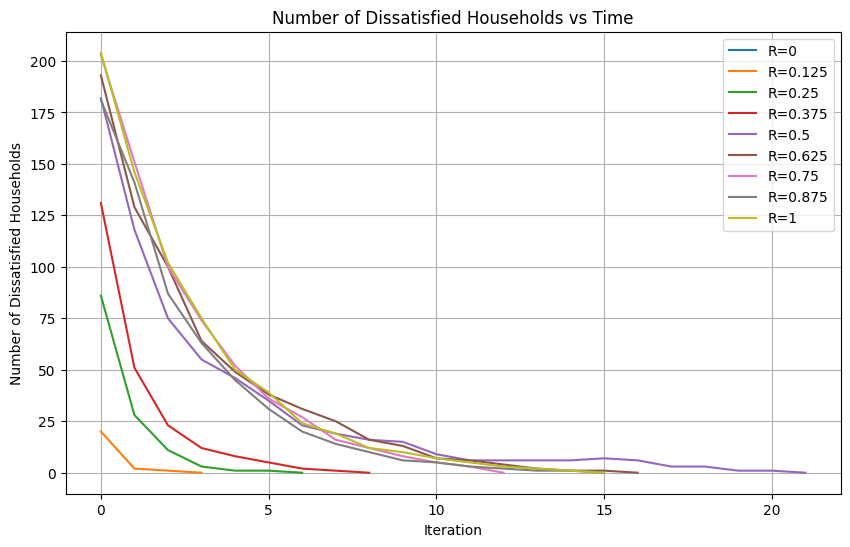

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def initialize_grid(N):
    grid = np.random.choice(['X', 'O', ''], size=(N, N), p=[0.25, 0.25, 0.5])
    return grid

def get_neighbors(grid, x, y, N):
    neighbors = []
    for i in range(max(0, x-1), min(N, x+2)):
        for j in range(max(0, y-1), min(N, y+2)):
            if (i, j) != (x, y):
                neighbors.append(grid[i][j])
    return neighbors

def is_satisfied(grid, x, y, R, N):
    agent_type = grid[x][y]
    neighbors = get_neighbors(grid, x, y, N)
    same_type_count = neighbors.count(agent_type)
    total_neighbors = len(neighbors)
    if total_neighbors == 0:
        return True
    return same_type_count / total_neighbors >= R

def move_agents(grid, dissatisfied_agents, free_cells, N):
    random.shuffle(dissatisfied_agents)
    for agent in dissatisfied_agents:
        if free_cells:
            new_x, new_y = free_cells.pop()
            grid[new_x][new_y] = grid[agent[0]][agent[1]]
            grid[agent[0]][agent[1]] = ''

def run_simulation(N, R, max_iterations):
    grid = initialize_grid(N)
    dissatisfied_counts = []
    grid_history = [grid.copy()]  # Store the initial grid
    for iteration in range(max_iterations):
        dissatisfied_agents = []
        free_cells = []
        for i in range(N):
            for j in range(N):
                if grid[i][j] != '' and not is_satisfied(grid, i, j, R, N):
                    dissatisfied_agents.append((i, j))
                    free_cells.append((i, j))
                elif grid[i][j] == '':
                    free_cells.append((i, j))
        dissatisfied_counts.append(len(dissatisfied_agents))
        move_agents(grid, dissatisfied_agents, free_cells, N)
        grid_history.append(grid.copy())  # Store the grid after each iteration
        if not dissatisfied_agents:
            break
    return grid_history, dissatisfied_counts

def create_gif(grid_history, filename):
    images = []
    cmap = {'X': 1, 'O': 2, '': 0}  # Map grid elements to numerical values
    for grid in grid_history:
        numerical_grid = np.vectorize(cmap.get)(grid)
        fig, ax = plt.subplots()
        cax = ax.matshow(numerical_grid, cmap=plt.cm.viridis)
        fig.colorbar(cax)
        ax.axis('off')
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
        plt.close(fig)
    imageio.mimsave(filename, images, fps=2)

def plot_dissatisfied_counts(dissatisfied_counts_list, R_values):
    plt.figure(figsize=(10, 6))
    for dissatisfied_counts, R in zip(dissatisfied_counts_list, R_values):
        plt.plot(dissatisfied_counts, label=f'R={R}')
    plt.xlabel('Iteration')
    plt.ylabel('Number of Dissatisfied Households')
    plt.title('Number of Dissatisfied Households vs Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
N = 20  # Grid size
R_values = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
max_iterations = 100

# Run simulations and create GIFs
dissatisfied_counts_list = []
for R in R_values:
    grid_history, dissatisfied_counts = run_simulation(N, R, max_iterations)
    dissatisfied_counts_list.append(dissatisfied_counts)
    create_gif(grid_history, f'grid_evolution_R_{R}.gif')

# Plot dissatisfied counts
plot_dissatisfied_counts(dissatisfied_counts_list, R_values)
